In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly as py
import data_retriever as dr
from config import api_key
import requests
import plotly.graph_objs as go

In [6]:
regions = ['Africa','Asia','Europe','North America','Oceania','South America', 'Unknown']


In [7]:
refugees= dr.get_dhs_data_by_table_number(13)

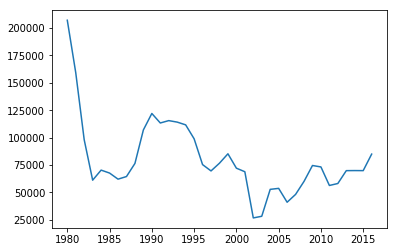

In [8]:
plt.plot(refugees['Year'],refugees['Number'])

In [9]:
refugee_by_region = dr.get_dhs_data_by_table_number(14)
refugee_by_region = refugee_by_region.loc[refugee_by_region['Region and country of nationality'].isin(regions)]

In [10]:
refugee_by_region =refugee_by_region.rename(columns={'Region and country of nationality': 'region'})

In [11]:
refugee_by_region = refugee_by_region.set_index('region')
refugee_by_region = refugee_by_region.fillna(0)

In [12]:
totals = [48218, 60107, 74602, 73293, 56384.0, 58179.0, 69909.0, 69975.0, 69920.0,
 84989.0]
colors =  ['b','g','r','m','y','k', 'orange']


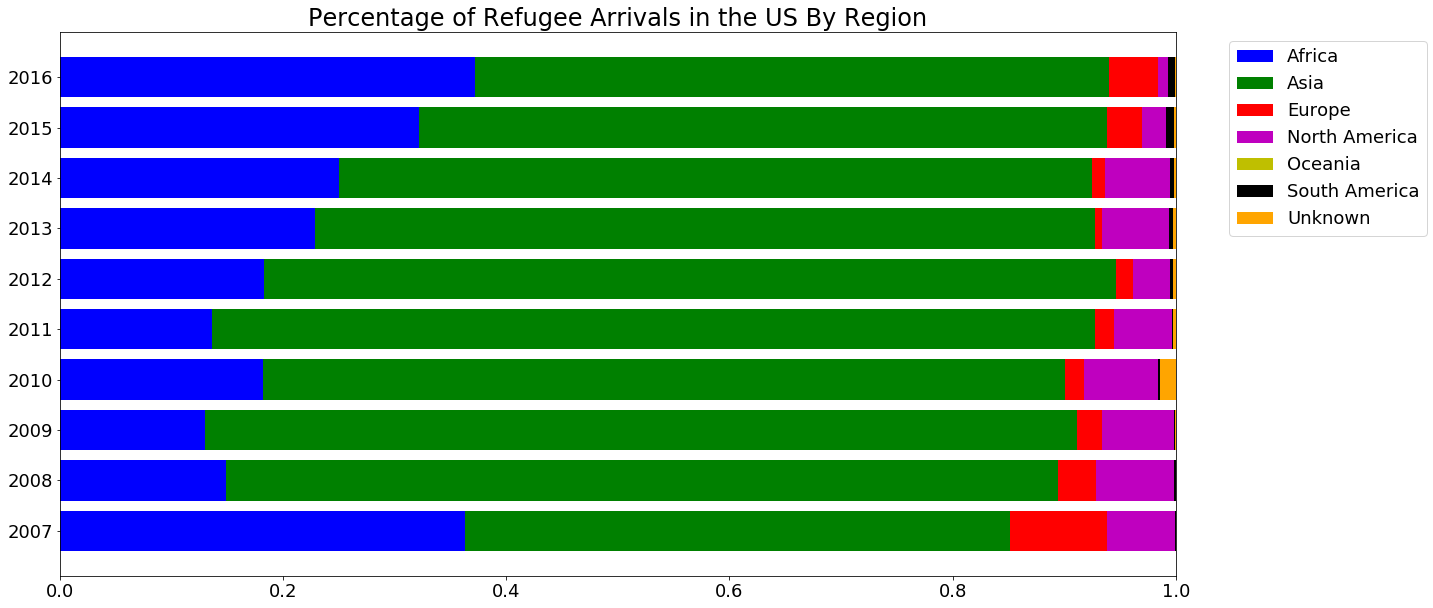

In [13]:
regions = [i for i in list(refugee_by_region.columns) if i not in ['region']]
ind = [x for x, _ in enumerate(regions)]
plt.figure(figsize=(20,10))
sums = np.zeros(shape=(10))
for i,region in enumerate(refugee_by_region.index):
    vals = refugee_by_region.loc[region].values/totals
    plt.barh(ind, vals, label=region, color=colors[i], left=sums)
    sums = np.add(sums,vals)


plt.yticks(ind,regions,fontsize=18)
plt.xticks(fontsize=18)
plt.title("Percentage of Refugee Arrivals in the US By Region", fontsize=24)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", prop={'size': 18})
plt.show()


<BarContainer object of 10 artists>

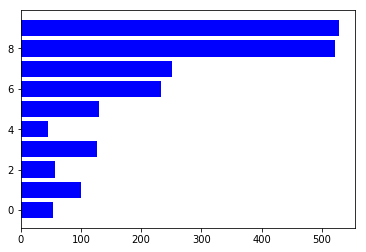

In [14]:
plt.barh(ind, refugee_by_region.loc['South America'].values, label=region, color='b')

In [15]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

In [16]:
refugee_by_country = dr. get_dhs_data_by_table_number(14)
refugee_by_country = refugee_by_country.loc[~refugee_by_country['Region and country of nationality'].isin(regions)]
refugee_by_country = refugee_by_country.loc[~refugee_by_country['Region and country of nationality'].isin(['Total','REGION','COUNTRY'])]

refugee_by_country=refugee_by_country.rename(columns={'Region and country of nationality':'country'})
refugee_by_country.head()

,country,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
2,Africa,17486,8943,9678,13325,7693.0,10629.0,15984.0,17501.0,22492.0,31648.0
3,Asia,23564,44819,58309,52695,44583.0,44416.0,48840.0,47197.0,43115.0,48287.0
4,Europe,4192,2059,1693,1238,996.0,908.0,482.0,818.0,2164.0,3664.0
5,North America,2922,4177,4800,4856,2930.0,1948.0,4206.0,4066.0,1528.0,811.0
6,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
data = dict(type='choropleth',
locations = refugee_by_country['country'],
locationmode = 'country names', z = refugee_by_country[2016],
text = refugee_by_country['country'], colorbar = {'title':'Immigration in 2016'},
colorscale = 'Blues',reversescale = True)

In [18]:
layout = dict(title='2016 Immigration',
geo = dict(showframe=False,projection={'type':'robinson'}))

In [19]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [20]:
app_data = dr.get_bp_data_by_table_number(1)

In [59]:
color = 'rgb(128, 0, 32)'

In [22]:
city_coord = {}
for city in app_data['SECTOR'].unique():
    if city in (["Southwest Border"]):
        break
    try:
        target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
        'address={0}&key={1}').format(city, api_key)
        geo_data = requests.get(target_url).json()
        lat = geo_data["results"][0]["geometry"]["location"]["lat"]
        lng = geo_data["results"][0]["geometry"]["location"]["lng"]
        city_coord[city] = [lat, lng]
    except:
        print("Could not find for city {}".format(city))
        
        


In [60]:

totals = []
for city in city_coord:
    totals.append(go.Scattergeo(
        lon = [city_coord.get(city)[1]],
        lat = [city_coord.get(city)[0]],
        text = app_data[(app_data['SECTOR']==city) & (app_data['Fiscal Year']==2017)]['Yearly Total'],
        name = city,
        marker = dict(
            size = app_data[(app_data['SECTOR']==city) & (app_data['Fiscal Year']==2017)]
            ['Yearly Total'].str.replace(',', '').astype(float)/4000,
            color = color,
            line = dict(width = 0)
        ),
    ) )

In [62]:
layout = dict(
        title = 'Apprehensions',
        geo = dict(
            scope='usa',
            showrivers = True,
            projection=dict( type='albers usa' ),
            lakecolor = 'rgb(255, 255, 255)',
            resolution = 50
            
        ),
    )

fig = go.Figure(layout=layout, data=totals)
iplot(fig,validate=False)